Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
• All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.



Dataset Link-

•https://github.com/dsrscientist/dataset4

•https://github.com/dsrscientist/dataset4/blob/main/Grades.csv


In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv", index_col =["Seat No."] )
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
CS-97002,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
df.shape

(571, 42)

Columns Description-  total 43 columns and 571 rows. one target = cpga the rest are features

In [4]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, CS-97001 to CS-97571
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-

two types of data (object, float64); we have different non null count (suggests irregolarity in the data and will need data cleaning)

In [6]:
print(df.isnull().sum())
print("\n")
print("sum of the null values: ",df.isnull().sum().sum())
      

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64


sum of the null values:  425


There are null values in the data, because they are categorical data, and they all of the same nature of of marks, I will replace the missing values with the mode and check how the model perform first. 

In [7]:
df= df.fillna(df.mode().iloc[0])

In [8]:
## ENCODING CATEGORICAL DATA

# Encoding categorical data using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
CS-97002,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
CS-97003,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
CS-97004,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
CS-97005,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448


The GPA has been converted into numbers

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64
0
AxesSubplot(0.125,0.125;0.62x0.755)


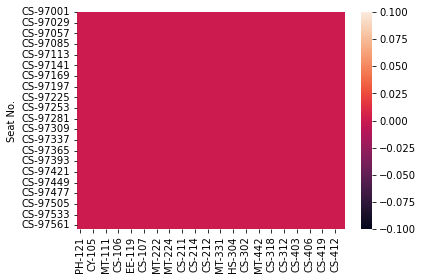

In [9]:
print(df.isnull().sum())

print(df.isnull().sum().sum())

# Data visualization of the null values
print(sns.heatmap(df.isnull()))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, CS-97001 to CS-97571
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   MT-111     571 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    float64
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    float64
 10  CS-107     571 non-null    float64
 11  HS-205/20  571 non-null    float64
 12  MT-222     571 non-null    float64
 13  EE-222     571 non-null    float64
 14  MT-224     571 non-null    float64
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    float64
 17  CS-203     571 non-null    float64
 18  CS-214     571 non-null    float64
 19  EE-217     571 non-null    float64
 20  CS-

571  Non-Null Count throughout

## Description of Dataset

In [49]:
# checking for duplicated values in the dataframe
df.duplicated().sum()

0

In [53]:
from sklearn.model_selection import train_test_split
x = df.drop(["CGPA"], axis=1)
y = df["CGPA"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)    



(456, 41) (456,)
(115, 41) (115,)


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split

def create_pipeline_and_evaluate(x_train, y_train, x_test, y_test, model_type='regression'):
    numeric_features = x_train.columns
    numeric_transformer = StandardScaler()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])

    if model_type == 'regression':
        regressors = [
            ('Linear Regression', LinearRegression()),
            ('Lasso', Lasso()),
            ('Ridge', Ridge()),
            ('KNN', KNeighborsRegressor()),
            ('Decision Tree', DecisionTreeRegressor()),
            ('SVR', SVR()),
            ('Random Forest', RandomForestRegressor()),
            ('Extra Trees', ExtraTreesRegressor()),
            ('Gradient Boosting', GradientBoostingRegressor()),
            ('AdaBoost', AdaBoostRegressor()),
            ('Bagging', BaggingRegressor()),
            ('Hist Gradient Boosting', HistGradientBoostingRegressor())
        ]
    else:
        pass

    for name, regressor in regressors:
        model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', regressor)])
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

        evaluation_metrics = {
            'Regressor': name,
            'Mean Absolute Error': mean_absolute_error(y_test, predictions),
            'Mean Squared Error': mean_squared_error(y_test, predictions),
            'R-squared': r2_score(y_test, predictions)
        }

        print(evaluation_metrics)

        cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
        print(f"Cross-Validation Scores for {name}:")
        print(cv_scores)
        print("Mean Cross-Validation R2 Score: ", cv_scores.mean())
        print("Difference between R2 and Cross-Validation Score: ", (r2_score(y_test, predictions) - cv_scores.mean()) * 100)
        print('\n')

create_pipeline_and_evaluate(x_train, y_train, x_test, y_test, model_type='regression')


{'Regressor': 'Linear Regression', 'Mean Absolute Error': 0.09208281349515453, 'Mean Squared Error': 0.01335794910712472, 'R-squared': 0.9611489076242796}
Cross-Validation Scores for Linear Regression:
[0.90074368 0.94214601 0.76482497 0.94178601 0.92011237]
Mean Cross-Validation R2 Score:  0.8939226077934179
Difference between R2 and Cross-Validation Score:  6.72262998308617


{'Regressor': 'Lasso', 'Mean Absolute Error': 0.5063225591151792, 'Mean Squared Error': 0.34524357695290026, 'R-squared': -0.00412795353196338}
Cross-Validation Scores for Lasso:
[-2.03961256e-02 -1.77038747e-05 -4.02328422e-03 -3.74558167e-04
 -7.56568470e-03]
Mean Cross-Validation R2 Score:  -0.006475471314103665
Difference between R2 and Cross-Validation Score:  0.2347517782140285


{'Regressor': 'Ridge', 'Mean Absolute Error': 0.09185907767071318, 'Mean Squared Error': 0.013288169377737925, 'R-squared': 0.9613518593416891}
Cross-Validation Scores for Ridge:
[0.90112245 0.94248358 0.76486675 0.94223017 0.9202

From the difference of both R2 score and Cross Validation score computed on R2 score we can conclude that AdaBoostRegressor() is the best fitting and best performance

## HyperTuning

In [61]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'loss':['linear', 'square']
    
}



gscv = GridSearchCV(
    AdaBoostRegressor(),
    param_grid,
    cv=5,  
    
)

gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'loss': ['linear', 'square'],
                         'n_estimators': [100, 200, 300]})

In [62]:
gscv.best_params_

{'learning_rate': 0.2, 'loss': 'square', 'n_estimators': 300}

In [63]:
Model  = AdaBoostRegressor(learning_rate=0.2, loss="square", n_estimators=300)
Model.fit(x_train, y_train)
pred = Model.predict(x_test)
print(Model)
print("R2_score: ", r2_score(y_test, pred)*100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,pred))
print("Mean Squared Error: ", mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred)))

AdaBoostRegressor(learning_rate=0.2, loss='square', n_estimators=300)
R2_score:  90.54915578938844
Mean Absolute Error:  0.14954468301269977
Mean Squared Error:  0.03249429765419117
Root Mean Squared Error:  0.18026174761771055


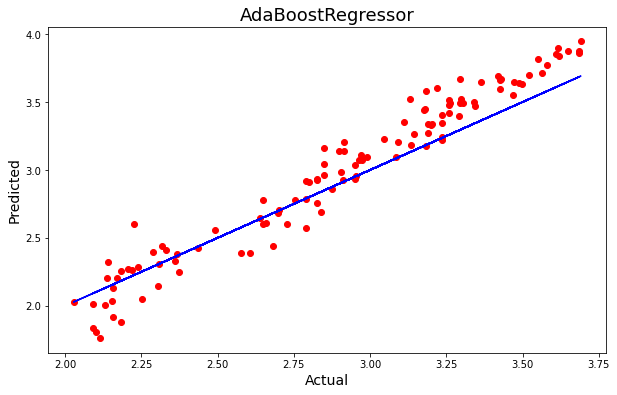

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(x=pred, y=y_test, color="r")
plt.plot(pred, pred, color = "b")
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("AdaBoostRegressor", fontsize=18)
plt.show()

as you can see not all the data predicted points are fitted on the best fit line (90%)

In [65]:
import joblib
joblib.dump(Model, 'Student_grades_prediction.pkl')

['Student_grades_prediction.pkl']

In [66]:
import pickle
filename = 'Student_grades_prediction.pkl'
pickle.dump(Model,open(filename, 'wb'))  #saved the model

In [67]:
import pickle
loaded_model = pickle.load(open('Student_grades_prediction.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

90.54915578938844
